In [18]:
import pyaudio
from tensorflow.keras.models import load_model
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
from threading import Thread
from pydub import AudioSegment

Chunk Duration= CHUNK/RATE =1024/44100 ≈0.023seconds (23 ms). each read operation corrsponds to 23ms of audio data

In [25]:
FORMAT = pyaudio.paInt16
CHANNELS = 2
RATE = 44100
CHUNK = 2048

audio = pyaudio.PyAudio()

In [26]:
audio_stream = audio.open(format = FORMAT, channels = CHANNELS, rate = RATE, frames_per_buffer = CHUNK, input = True)
nfft = 200 # Length of each window segment
fs = 8000 # Sampling frequencies
noverlap = 120 
try:
    while True:
        data = audio_stream.read(CHUNK)
        audio_data = np.frombuffer(data, dtype=np.int16)
except KeyboardInterrupt:
    print("Stopping...")
    audio_stream.stop_stream()
    audio_stream.close()
    audio.terminate()

Stopping...


In [27]:
print(audio_data.shape)

(4096,)


TypeError: len() of unsized object

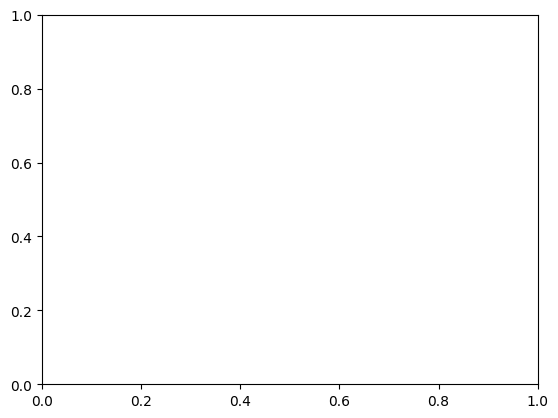

In [29]:
pxx, freqs, bins, im = plt.specgram(data, nfft, fs, noverlap = noverlap)


In [15]:
print(audio_data)

[-21 -20 -23 ...  -5   0 -16]


Listening for live audio...


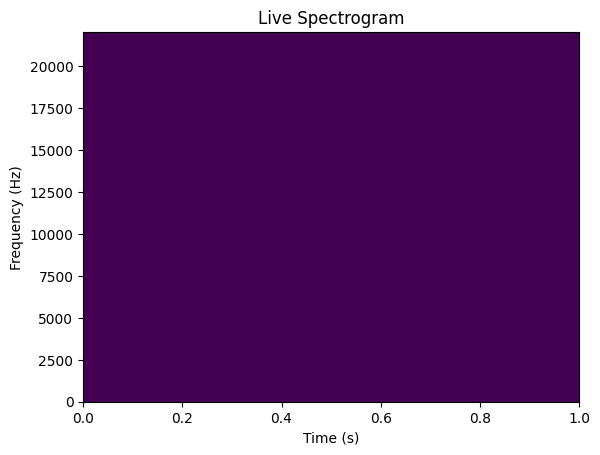

Stopping...


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
import pyaudio

# PyAudio Configuration
FORMAT = pyaudio.paInt16  # 16-bit resolution
CHANNELS = 1            # Mono audio
RATE = 44100               # Sampling rate (8 kHz)
CHUNK = 2048              # Number of frames per buffer
NFFT = 200                # FFT segment length
NOVERLAP = 120            # Overlap between segments

# Initialize PyAudio
audio = pyaudio.PyAudio()

# Open audio stream
stream = audio.open(format=FORMAT,
                    channels=CHANNELS,
                    rate=RATE,
                    input=True,
                    frames_per_buffer=CHUNK)

# Initialize a buffer to hold live audio data
buffer_size = RATE  # 1 second of audio (adjust as needed)
audio_buffer = np.zeros(buffer_size, dtype=np.int16)

# Real-Time Spectrogram Plot
plt.ion()  # Turn on interactive mode
fig, ax = plt.subplots()
ax.set_title("Live Spectrogram")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Frequency (Hz)")
img = ax.imshow(np.zeros((NFFT // 2, buffer_size // NFFT)),
                aspect='auto',
                extent=[0, buffer_size / RATE, 0, RATE / 2],
                origin='lower',
                cmap='viridis')

# Real-Time Processing
print("Listening for live audio...")
try:
    while True:
        # Read audio data
        data = stream.read(CHUNK, exception_on_overflow=False)
        audio_chunk = np.frombuffer(data, dtype=np.int16)
        
        # Update audio buffer (keep only the last `buffer_size` samples)
        audio_buffer = np.append(audio_buffer, audio_chunk)
        if len(audio_buffer) > buffer_size:
            audio_buffer = audio_buffer[-buffer_size:]
        
        # Compute spectrogram
        f, t, Sxx = spectrogram(audio_buffer, fs=RATE, nperseg=NFFT, noverlap=NOVERLAP)
        Sxx_log = 10 * np.log10(Sxx + 1e-7)  # Convert to dB scale
        
        # Update spectrogram plot
        img.set_data(Sxx_log)
        img.set_extent([0, buffer_size / RATE, 0, RATE / 2])
        plt.pause(0.01)

except KeyboardInterrupt:
    print("Stopping...")
    stream.stop_stream()
    stream.close()
    audio.terminate()
    plt.close()

